<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/FinalPS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first attempt at mapping the 2023 homelessness rates by County in New Jersey

In [58]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [59]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [60]:
#!python --version
gpd.__version__

'1.0.1'

Step 1

The first thing i did was to use the NJ counties shapefile already in my repository

In [61]:

! wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

zip_ref = zipfile.ZipFile('Municipality.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njMun=gpd.read_file('Municipalities.shp')

In [62]:
njMun.head()

,FID,COUSUBNS,GEOID,NAMELSAD,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry
0,1,00885144,3400702200,Audubon borough,C5,F,3838781,35535,+39.8901277,-75.0723825,9407.757950,3400702200,81d661c6-35a7-42ed-8afd-5f35d0b0e807,3.871214e+06,9407.757866,"POLYGON ((495599.23 4415536.249, 495508.749 44..."
1,2,00885145,3400702230,Audubon Park borough,C5,F,389606,46935,+39.8968373,-75.0888190,2734.677596,3400702230,f8ccbea8-76dd-44e7-992b-e367d22e31a1,4.361934e+05,2734.677499,"POLYGON ((492866.221 4416337.872, 492855.687 4..."
2,3,00885149,3400703250,Barrington borough,C5,F,4095340,0,+39.8689349,-75.0513618,11456.984021,3400703250,9e9086b1-16e4-429f-b5c4-d967de1dbd82,4.092067e+06,11456.984073,"POLYGON ((496819.374 4414558.505, 496827.878 4..."
3,4,00885154,3400704750,Bellmawr borough,C5,F,7729295,315734,+39.8663560,-75.0946695,18085.471872,3400704750,bdd07346-3ee8-471e-befd-b8b9e16eb0a9,8.038608e+06,18085.472003,"POLYGON ((492951.896 4413667.751, 492968.147 4..."
4,5,00885158,3400705440,Berlin borough,C5,F,9307767,35573,+39.7920594,-74.9369855,14823.777678,3400705440,032f4608-e579-4343-a5e1-7d3778ce56c5,9.335884e+06,14823.777540,"POLYGON ((507881.319 4403761.193, 507873.371 4..."


<Axes: >

Text(0.5, 1.0, 'Camden County Municipalities')

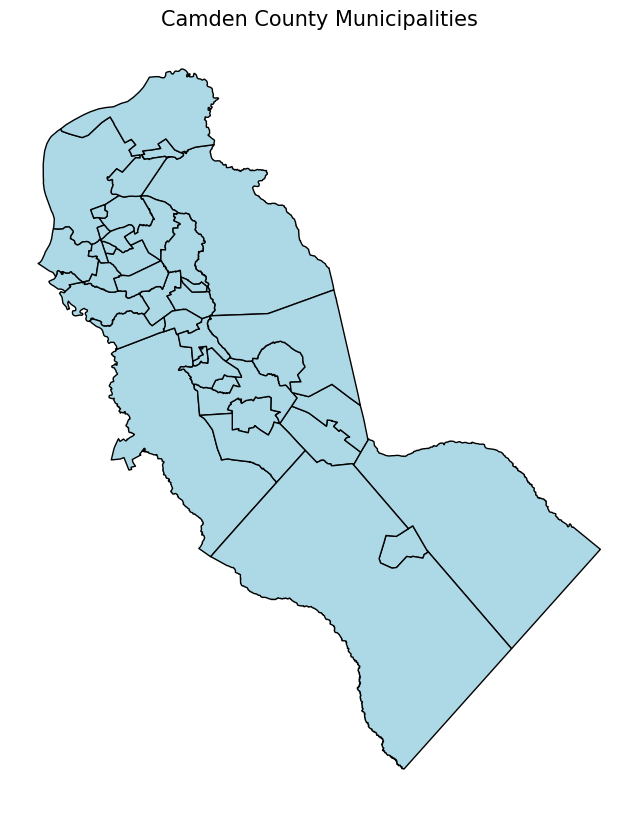

In [63]:

# Step 4: Plot the shapefile with black edges
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Create a figure and axis

# Plot with specified color and edgecolor
njMun.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and remove axis for a cleaner look
ax.set_title('Camden County Municipalities', fontsize=15)
ax.set_axis_off()


# Show the plot
plt.show()


Step 2


In [64]:
njMun.dtypes #with geopandas can do stuff like with pandas :)
#njMun.info()
col = gpd.read_file('Municipality.zip')
col.dtypes
col.head(3)

,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


,FID,COUSUBNS,GEOID,NAMELSAD,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry
0,1,00885144,3400702200,Audubon borough,C5,F,3838781,35535,+39.8901277,-75.0723825,9407.757950,3400702200,81d661c6-35a7-42ed-8afd-5f35d0b0e807,3.871214e+06,9407.757866,"POLYGON ((495599.23 4415536.249, 495508.749 44..."
1,2,00885145,3400702230,Audubon Park borough,C5,F,389606,46935,+39.8968373,-75.0888190,2734.677596,3400702230,f8ccbea8-76dd-44e7-992b-e367d22e31a1,4.361934e+05,2734.677499,"POLYGON ((492866.221 4416337.872, 492855.687 4..."
2,3,00885149,3400703250,Barrington borough,C5,F,4095340,0,+39.8689349,-75.0513618,11456.984021,3400703250,9e9086b1-16e4-429f-b5c4-d967de1dbd82,4.092067e+06,11456.984073,"POLYGON ((496819.374 4414558.505, 496827.878 4..."


In [65]:
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

In [66]:
njMun.head(3)


,FID,COUSUBNS,GEOID,Municipality,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry
0,1,00885144,3400702200,Audubon borough,C5,F,3838781,35535,+39.8901277,-75.0723825,9407.757950,3400702200,81d661c6-35a7-42ed-8afd-5f35d0b0e807,3.871214e+06,9407.757866,"POLYGON ((495599.23 4415536.249, 495508.749 44..."
1,2,00885145,3400702230,Audubon Park borough,C5,F,389606,46935,+39.8968373,-75.0888190,2734.677596,3400702230,f8ccbea8-76dd-44e7-992b-e367d22e31a1,4.361934e+05,2734.677499,"POLYGON ((492866.221 4416337.872, 492855.687 4..."
2,3,00885149,3400703250,Barrington borough,C5,F,4095340,0,+39.8689349,-75.0513618,11456.984021,3400703250,9e9086b1-16e4-429f-b5c4-d967de1dbd82,4.092067e+06,11456.984073,"POLYGON ((496819.374 4414558.505, 496827.878 4..."


In [67]:
MunPop=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')

In [68]:
MunPop.dtypes

,0
Municipality,object
population,int64


In [69]:
MunPop.head(3)

,Municipality,population
0,Audubon borough,8751
1,Audubon Park borough,994
2,Barrington borough,7096


In [70]:
njMun.dtypes

,0
FID,int32
COUSUBNS,object
GEOID,object
Municipality,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [71]:
#njMun1 = pd.merge(njMun, MunPop, on='Municipality',how='outer',indicator=True)
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun1 = njMun.merge(MunPop, on='Municipality', how='left')


In [72]:
njMun1.dtypes

,0
FID,int32
COUSUBNS,object
GEOID,object
Municipality,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [73]:
njMun1.head(3)

,FID,COUSUBNS,GEOID,Municipality,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry,population
0,1,00885144,3400702200,audubon borough,C5,F,3838781,35535,+39.8901277,-75.0723825,9407.757950,3400702200,81d661c6-35a7-42ed-8afd-5f35d0b0e807,3.871214e+06,9407.757866,"POLYGON ((495599.23 4415536.249, 495508.749 44...",8751
1,2,00885145,3400702230,audubon park borough,C5,F,389606,46935,+39.8968373,-75.0888190,2734.677596,3400702230,f8ccbea8-76dd-44e7-992b-e367d22e31a1,4.361934e+05,2734.677499,"POLYGON ((492866.221 4416337.872, 492855.687 4...",994
2,3,00885149,3400703250,barrington borough,C5,F,4095340,0,+39.8689349,-75.0513618,11456.984021,3400703250,9e9086b1-16e4-429f-b5c4-d967de1dbd82,4.092067e+06,11456.984073,"POLYGON ((496819.374 4414558.505, 496827.878 4...",7096


<Axes: >

[]

[]

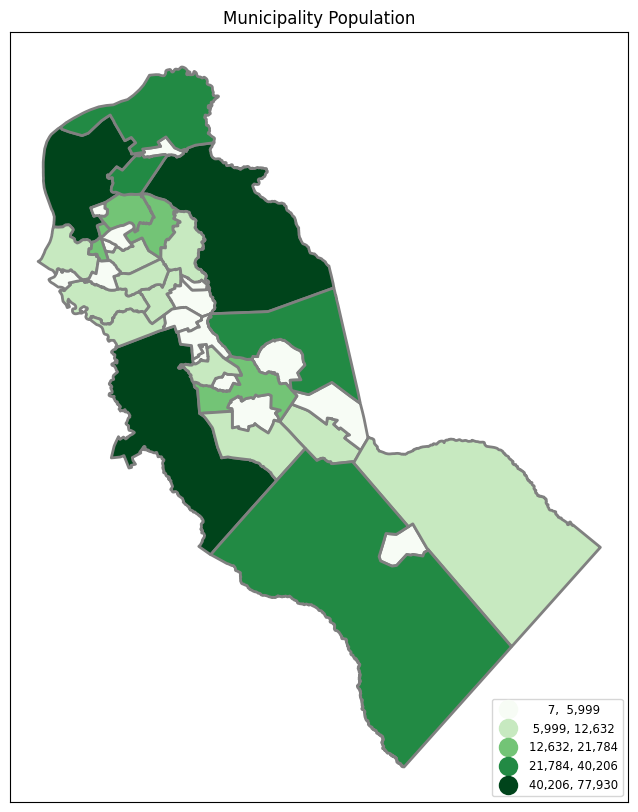

In [74]:

fig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun1.plot(ax=ax,column='population',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Municipality Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [75]:
MunHom=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20homelessness.xlsx')
MunHom.dtypes
MunHom.head(3)

,0
Municipality,object
Homelessness,int64


,Municipality,Homelessness
0,Audubon borough,1
1,Audubon Park borough,1
2,Barrington borough,0


In [76]:
MunHom['Municipality'] = MunHom['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun2 = njMun.merge(MunHom, on='Municipality', how='left')


<Axes: >

[]

[]

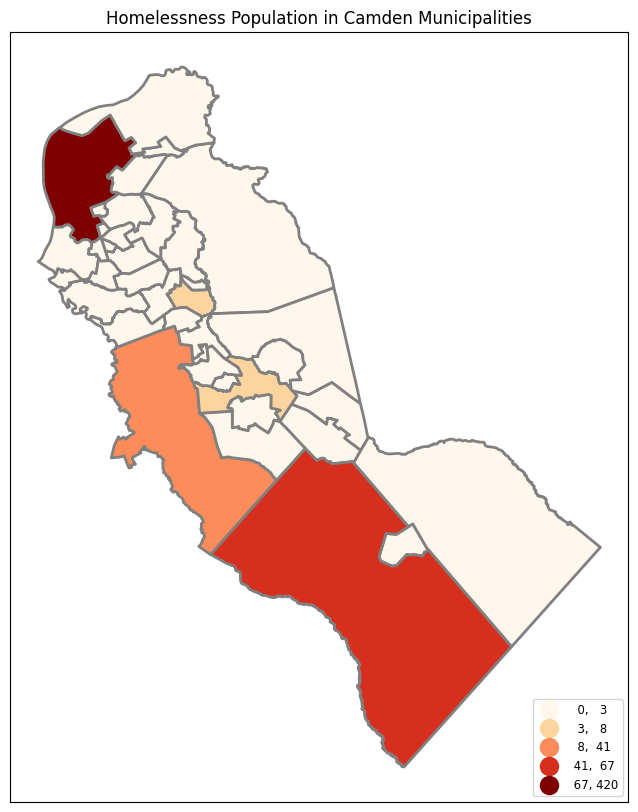

In [77]:
ig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun2.plot(ax=ax,column='Homelessness',legend=True,cmap='OrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Homelessness Population in Camden Municipalities")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [81]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col.dtypes
col.head(3)

,0
ID,object
METLNKID,object
FEATTYPE,object
SECCLASS,object
NAME,object
AREA,object
PHONE,object
ADDRESS,object
ADDRESS2,object
CITY,object


,ID,METLNKID,FEATTYPE,SECCLASS,NAME,AREA,PHONE,ADDRESS,ADDRESS2,CITY,...,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,DEGREE,ENROLL,geometry
0,10273936,None,POINT,UNCLASSIFIED,RAMAPO COLLEGE OF NEW JERSEY,201,684-7500,505 RAMAPO VALLEY RD,None,MAHWAH,...,-74.177826,41.082642,NAVTEQ,2006Q4,BLOCKFACE,None,None,MASTER'S DEGREE,5538,POINT (580936.143 819465.262)
1,10273934,None,POINT,UNCLASSIFIED,NEW BRUNSWICK THEOLOGICAL SEMINARY,732,247-5241,17 SEMINARY PL,None,NEW BRUNSWICK,...,-74.448814,40.501346,NAVTEQ,2006Q4,BLOCKFACE,None,None,DOCTOR'S DEGREE,203,POINT (506358.894 607539.257)
2,10273932,None,POINT,UNCLASSIFIED,MONMOUTH UNIVERSITY,732,571-3400,400 CEDAR AVE,None,WEST LONG BRANCH,...,-74.003765,40.281505,NAVTEQ,2006Q4,BLOCKFACE,None,None,POST-MASTER'S CERTIFICATE,6351,POINT (630565.964 527840.459)


In [83]:

! wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

zip_ref = zipfile.ZipFile('Municipality.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njMun=gpd.read_file('Municipalities.shp')
# Rename the columns in the njMun DataFrame
njMun.rename(columns={'INTPTLAT': 'Y', 'INTPTLON': 'X'}, inplace=True)

# Convert 'Y' and 'X' columns from object to float64
njMun['Y'] = pd.to_numeric(njMun['Y'], errors='coerce')
njMun['X'] = pd.to_numeric(njMun['X'], errors='coerce')

# Verify the change
print(njMun.dtypes)


FID              int32
COUSUBNS        object
GEOID           object
NAMELSAD        object
CLASSFP         object
FUNCSTAT        object
ALAND            int32
AWATER           int32
Y              float64
X              float64
Shape_Leng     float64
GEOCODE          int64
GlobalID        object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [99]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col.dtypes
col.head(3)

,0
ID,object
METLNKID,object
FEATTYPE,object
SECCLASS,object
NAME,object
AREA,object
PHONE,object
ADDRESS,object
ADDRESS2,object
CITY,object


,ID,METLNKID,FEATTYPE,SECCLASS,NAME,AREA,PHONE,ADDRESS,ADDRESS2,CITY,...,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,DEGREE,ENROLL,geometry
0,10273936,None,POINT,UNCLASSIFIED,RAMAPO COLLEGE OF NEW JERSEY,201,684-7500,505 RAMAPO VALLEY RD,None,MAHWAH,...,-74.177826,41.082642,NAVTEQ,2006Q4,BLOCKFACE,None,None,MASTER'S DEGREE,5538,POINT (580936.143 819465.262)
1,10273934,None,POINT,UNCLASSIFIED,NEW BRUNSWICK THEOLOGICAL SEMINARY,732,247-5241,17 SEMINARY PL,None,NEW BRUNSWICK,...,-74.448814,40.501346,NAVTEQ,2006Q4,BLOCKFACE,None,None,DOCTOR'S DEGREE,203,POINT (506358.894 607539.257)
2,10273932,None,POINT,UNCLASSIFIED,MONMOUTH UNIVERSITY,732,571-3400,400 CEDAR AVE,None,WEST LONG BRANCH,...,-74.003765,40.281505,NAVTEQ,2006Q4,BLOCKFACE,None,None,POST-MASTER'S CERTIFICATE,6351,POINT (630565.964 527840.459)


<ipython-input-96-cfd81a1658f2>:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  col_within_camden = col[col.geometry.within(njMun.unary_union)]


Number of universities within Camden: 0


<Axes: >

No universities found within Camden municipalities.


Text(0.5, 1.0, 'Universities in Camden County')

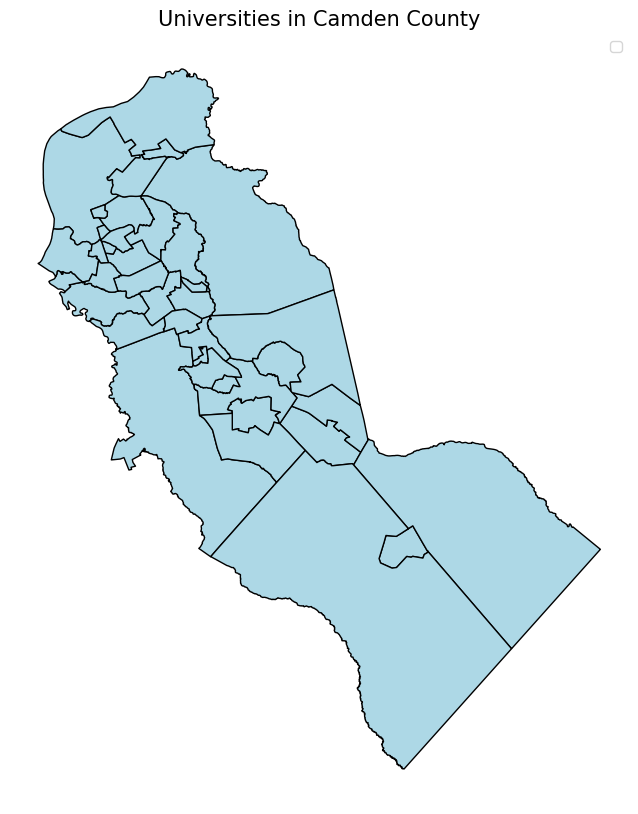

In [96]:
if njMun.crs != col.crs:
    col = col.to_crs(njMun.crs)  # Reproject universities to match municipalities

# Step 4: Filter the universities to only those within Camden municipalities using union_all()
col_within_camden = col[col.geometry.within(njMun.unary_union)]

# Debugging step: Check how many universities are within Camden
print(f"Number of universities within Camden: {len(col_within_camden)}")

# Step 5: Plot the municipalities and overlay the universities
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the municipalities
njMun.plot(ax=ax, color='lightblue', edgecolor='black')

# Overlay the universities within Camden
if not col_within_camden.empty:
    col_within_camden.plot(ax=ax, color='red', markersize=10, label='Universities')
else:
    print("No universities found within Camden municipalities.")

# Add titles and legend
ax.set_title('Universities in Camden County', fontsize=15)
ax.set_axis_off()
ax.legend()

# Show the plot
plt.show()

In [ ]:
col['enr'] = col.ENROLL.astype(float)

## join/merge
 awesome power! use it a lot

make it easy on yourself! work smart, not hard! so simplify or subset:
say instead of 200 little indian regions just do 20 big provinces; and instead of 50 convoluted variables, just retain 5<br>

merge may get difficult (especially if difficult data so again simplify): if you need more power:

https://colab.research.google.com/github/theaok/datManPy/blob/main/pandas.ipynb#scrollTo=dMPPOPS92WkA

<br>

 <br>we will cover how to map multiple variables in one map  later; for now just use 2 separate maps; and calculate new variables! for instance instead of having 2 maps for crime in 1970 and 2000 just have percent difference: 100*(crim2000-crim1970)/crim1970

### housing/zillow example

say want to map housing values across nj counties

first get the counties shp (already got it)

now get regular data with housing values and merge with counties shp

and finaly color code the polygons with housing values




#### zillow dat man
(again note can collapse and run all at once)

housing prices for NJ counties (i just googled 'housing prices data') (http://www.zillow.com/research/data):

https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls



adjust ID: make counties uppercase (or could drop 'County' from COUNTY LABEL variable)


and clean up:  drop first row if junk in it, excessive columns, \$ \%,\#, etc

code everything so the end product is like:

https://raw.githubusercontent.com/theaok/data/main/all_homes.csv


In [ ]:
zilXls=pd.read_excel('https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls')

In [ ]:
zilXls.head(2)

In [ ]:
zilXls.dtypes
#zilXls.info(verbose=True)

In [ ]:
zilXls1=zilXls[['NJ Zillow Home Value Index - All Homes','Unnamed: 203']]
zilXls1.rename(columns={'NJ Zillow Home Value Index - All Homes': 'county'}, inplace=True)
zilXls1.rename(columns={'Unnamed: 203': 'dec2012'}, inplace=True)
zilXls1

In [ ]:
zilXls2=zilXls1.iloc[1:, :] #drop first obs
zilXls2 #note missing val for Morris; always think abt missing data!

In [ ]:
zilXls2['COUNTY']=zilXls2['county'].str.upper()
zil1=zilXls2
zil1

In [ ]:
#obsolete (was loading cleaned up already data without cleaning in py)
#!wget -q -O zillow.csv  https://docs.google.com/uc?id=1Q4tCZT0EfaJP_WGwKcxuPaQ_dDFonW4E&export=download
#!wget -q -O zil0.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
#zil0=pd.read_csv('zil0.csv')
#zil0.head(3)
#zil1=zil0[['UPPER','Dec 2012']]
#zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset
#zil1 #note missing val for Morris; always think abt missing data!

#### zillow merge and map

In [ ]:
#merge
njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
njC1[['COUNTY','dec2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

In [ ]:
njC2 = pd.merge(njC, zil1, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='dec2012',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Zillow Home Value Index")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

###  abortions example

In [ ]:
# get data: https://data.guttmacher.org/ has a nice API
# can click thru to get the table we want, which results in url (can open in webbrowser):
# https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ
# and then can right click on 'download xls' (csv is messy in this case) button under the table and 'copy link address' and paste into wget (need quotes!):
!wget -q -O njAb0.xls  "https://data.guttmacher.org/download?locationType=county&visualization=datatable&topic=244+247&locations=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&measures=424+425+426+427+428+429+436+437+438+439+440+441+442&totalKey=NJ"

In [ ]:
# alternatively can scrap the table
#import requests
#url = 'https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ'
#header = {
#  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#  "X-Requested-With": "XMLHttpRequest"
#}
#r = requests.get(url, headers=header)
#pd.read_html(r.text,match='U.S. County',flavor=None)[0].head(3) #for match just putting name of first col

In [ ]:
njAb0=pd.read_excel('njAb0.xls')
njAb0.head(3)
njAb0.columns

In [ ]:
njAb=njAb0[['U.S. County','Total publicly funded clinics, 2015 [1]']] #keep it simple

In [ ]:
#look at shapefile cnty names
njC.COUNTY_LAB #(make sure to have njC shapefile from previous sec)

In [ ]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC['U.S. County']

In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='outer',indicator=True)
njCAb[['COUNTY','Total publicly funded clinics, 2015 [1]','_merge']].head(50) # ok fine just junk from the bottom like sources etc and NJ as state didnt merge, so can do clean inner merge

In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='inner',indicator=True) #inner merge
#njCAb

In [ ]:
njCAb.dtypes

In [ ]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
njCAb['publicly funded clinics, 2015'] = njCAb['Total publicly funded clinics, 2015 [1]'].astype(float)

In [ ]:
njCAb[['U.S. County','Total publicly funded clinics, 2015 [1]','publicly funded clinics, 2015']]

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))

njCAb.plot(ax=ax,figsize=(10,12),column='publicly funded clinics, 2015',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_title('count of publicly funded abortion clinics, 2015')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from guttmacher.org
            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

### [sep19] us census data example

census is a great source of data, even at neigh lev!

for neigh lev (census tracts)  want 5-yr ACS

https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx

https://data.census.gov/cedsci/advanced

Geography: Tract: New Jersey: Camden County: All Census Tracts within Camden County

note: selection appears in the left panel

Topics: Income and Poverty: Poverty: Official Poverty Measure

Years: 2015

Search

click ``POVERTY STATUS IN THE PAST 12 MONTHS''  (ACS2011-2015 S1701)

(take note of margins of errors)

sure can transpose and download as csv but its a mess!




one rule to guide us is to be lazy/work smart, not hard

just find a decent alternative to messy census such as:

socialexplorer.com (free on-campus or vpn)

ACS 2015-2019

SE:A13003B. Poverty Status in 2019 for Population Age 18 to 64

tracts in camden county nj

https://www.socialexplorer.com/tables/ACS2019_5yr/R13437109

downloaded as csv and reposted:
https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv



In [ ]:
!wget -q -O pov0.csv https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv

pov0=pd.read_csv('pov0.csv')
pov0.head(3)

In [ ]:
#as per the above documentation we see prop in pov is SE_A13003B_002/SE_A13003B_001
pov0['pov']=(pov0.SE_A13003B_002/pov0.SE_A13003B_001)*100
pov=pov0[['pov','Geo_NAME']]
pov

get geo data

https://www.census.gov/geo/maps-data/data/tiger-line.html

Download-Web Interface: 2019: Census Tracts: New Jersey

reposted:
https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip

In [ ]:
! wget -q -O tracts.zip https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip
zip_ref = zipfile.ZipFile('tracts.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
#! ls
tracts=gpd.read_file('tl_2019_34_tract.shp')

In [ ]:
tracts.plot() #humongous, thousands of tracts!

In [ ]:
tracts.dtypes

In [ ]:
#tracts.head(3) #commented out because a lot of output; but have a look: geometries: x/y or lat/lon

In [ ]:
tracts["COUNTYFP"].value_counts(dropna=False)

google it

https://www.google.com/search?client=firefox-b-1-d&q=nj+counties+fips+codes

https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey

In [ ]:
tractsCam=tracts[tracts.COUNTYFP=='007']

In [ ]:
tractsCam.plot() #yay

In [ ]:
tractsCam.NAMELSAD

In [ ]:
a1 = pd.merge(tractsCam, pov, left_on='NAMELSAD', right_on='Geo_NAME',how='outer',indicator=True)

In [ ]:
a1['_merge'].value_counts() #yay

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
a1.plot(ax=ax,column='pov',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})
ax.title.set_text("Percent in poverty")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/var def: socialexplorer.com/tables/ACS2019_5yr/R13437109''')

# [oct3] bells and whistles (geopandas)

we did basic easy mapping, but there's more to it

here not that you have to pick up all of this, just pick whats useful for you!




TODO expand on everything geopandas
TODO do a bit of pandas for dat man




### schemes (classification)


(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'prettybreaks', 'stdmean', 'userdefined'])

In [ ]:
njC.plot(column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

In [ ]:
#do think how distribution translate into colors!!
njC.POPDEN2010.hist() #super skewed!

In [ ]:
njC.POPDEN2010.hist(bins=50) #see better

In [ ]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
njC.plot(column="POPDEN2010", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[2000, 4000, 7000]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


###  subset shapefile

In [ ]:
!wget -q -O us.zip https://github.com/theaok/data/raw/main/cb_2018_us_state_500k.zip
zip_ref = zipfile.ZipFile('us.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
us=gpd.read_file('cb_2018_us_state_500k.shp')
us.plot()

In [ ]:
cont = us[~us['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
cont.plot()

or just google for what you want; even possibly with inset :)

https://www.google.com/search?client=firefox-b-1-d&q=uss+hapefile+alaska+perto+rico+inset

or:

https://www.google.com/search?client=firefox-b-1-d&q=coniguous+us+states+shapefgile

eg:
https://cartographyvectors.com/map/1201-contiguous-us-with-states

### aggregate data: groupby+agg

make sure stuff matches 1:1, not 1:many, eg when you merge uni to counties, thats many:1, many uni per 1 county, need to aggregate first to a summary stats like sum!!!

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [ ]:
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col0 = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col0.dtypes
col0.head(3)

In [ ]:
col=col0[['COUNTY','NAME','ENROLL']]
#col
col.ENROLL=col.ENROLL.astype(float)
col.sort_values(by='COUNTY',inplace=True)
col

In [ ]:
colAgg=col.groupby('COUNTY').agg('sum')
colAgg
6845+7035==13880  #double check from previous table

#then can merge and map :)

### standardize and finer resolution

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','SQ_MILES','geometry']]

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
njC['popDen10']=njC.POP2010/njC.SQ_MILES

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='popDen10',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
njM0=gpd.read_file('nj_munis.shp')
njM=njM0[['COUNTY','POP2010','POPDEN2010','SQ_MILES','geometry']]

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njM.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

### overlay and side-by side

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
njC.plot(ax=axs[0],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2010 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])

njM.plot(ax=axs[1],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 2010 (pers)")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njM.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

In [ ]:
njC.COUNTY

to overlay 2 polygon layers, probably cleanest to just have 2 categories for the overlay: subset frist to some interesting area, and then overlay that

In [ ]:
njC_cam_cum=njC.query("COUNTY=='CAMDEN' | COUNTY=='CUMBERLAND'")

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=3,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#just like subset and hash or dot
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1)
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='/')
njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''pop 2010''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='blue', facecolor='none',
                     hatch='///', label=r'some condition')

l2=plt.legend(handles=[bluePatch],loc='lower left')

ax.add_artist(l2)
ax.add_artist(l1)


#njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

In [ ]:
#overlay with points, same as earlier under sec: dive...
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')

#overlay: just use plot fn twice
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='university', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

In [ ]:
from pandas.core.interchange.dataframe_protocol import Column
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')

#overlay: just use plot fn twice
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o',markersize=50,legend=True,column='NAICSDESCR',
         legend_kwds= {
        'loc':'lower left','title_fontsize':'medium','fontsize':'xx-small','markerscale':1.0})
#ok first stab, but too cluttered; group into like say max 5 cats

#### add to canvas anything: turn anything into img eg pd styler

In [ ]:
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]


In [ ]:
njCs = njC[['COUNTY','POP2010']].sort_values(by='POP2010', ascending=False)
sty = njCs.style.background_gradient(cmap='YlOrRd')
sty

In [ ]:
imgkit.from_string(sty.to_html(), 'sty.jpg')

import matplotlib.image as mpimg
img = mpimg.imread('sty.jpg')
plt.imshow(img)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5),tight_layout=True)
njC.plot(ax=axs[0],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2010 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])

axs[1].imshow(img,aspect='auto') #,  extent=[0,1,0,1]  aspect=3.5
axs[1].set_axis_off()
axs[1].set_xticks([]); axs[1].set_yticks([])

### centroids thematic maps

In [ ]:
njP = njC.copy()

njP["geometry"] = njP["geometry"].centroid

In [ ]:
njP.head(3)

In [ ]:
njP.plot()

In [ ]:
ax=njC.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=4) #ytext=(3, 3), textcoords="offset points"

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njP.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

njP.plot(ax=ax,column='POPDEN2010',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population 2010")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''density''')



ax.add_artist(l2)
ax.add_artist(l1)

### basemap

https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

In [ ]:
! pip install contextily
import contextily as cx

In [ ]:
njC = njC.to_crs(epsg=3857)

In [ ]:
ax = njC.plot(figsize=(10, 20), alpha=0.5, edgecolor="red")
#cx.add_basemap(ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
ax.set_axis_off()

### annotate

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")

ax.text(400000, 800000, r'blah', fontsize=14, color='green')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(400000, 800000), width=200000, height=300000, edgecolor='g', fc='None', lw=1)
ax.add_patch(e1)

### interactive and heat maps [skip]

https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

https://nbviewer.org/gist/perrygeo/c426355e40037c452434 (heatmaps)

<br>we will use folium/leaflet later instead

# [oct12] other vis than gis/maps

it's gis--vis with maps, but do other vis too!

In [ ]:
#but first wiki
pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_race/ethnicity',match="Mixed")[0].head(5) #for match use header of col; ideally unique; case may matter


In [ ]:

pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

#note if bunch of tables and or cant easily fetch teh right one, just fetch them all
#and then select the right one
#tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#tables[0]
#tables[1]
#etc

In [ ]:
import seaborn as sns

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

In [ ]:
auto[:10].style.background_gradient(cmap='Greens') #RdYlGn #https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.heatmap(auto.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

In [ ]:
auto.mpg.hist()

In [ ]:
sns.jointplot(x ='mpg', y ='price', data = auto)

In [ ]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [ ]:
px.scatter(auto, x="weight", y="mpg", color="price",
                  hover_data=['make'],width=1000,height=600)

In [ ]:
df = px.data.gapminder().query("year == 2007")
px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                 color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

# [oct26] geo-processing

the class is really about thematic maps, what we've been doing so far; but sometimes you need to use some GIS data processing tools, there is a bunch, here just some more common ones

### I/O
(in gpd its fiona/gdal; btw ogr2ogr is very powerfull)

In [ ]:
import fiona; fiona.supported_drivers

# There is a list of available drivers which are unexposed but supported
# (depending on the GDAL-build).
# You can activate these on runtime
# by updating the supported_drivers dictionary like:
# fiona.supported_drivers["NAS"] = "raw"
fiona.supported_drivers['KML'] = 'rw'

In [ ]:
!wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')
njC01=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

njC=njC01.copy()
njC['geometry'] = njC.simplify(tolerance=2000) #simplify geo (sec below)--important for online mapping
#njC.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

In [ ]:
njC.to_file('njC.kml', driver='KML')
!head -25 njC.kml #starts with ERROR:fiona._env:`njC.kml' not recognized as a supported file format.
#but still works fine; go to:
#https://www.google.com/maps/d/
#hit create new map and hit Import under layers at top right

In [ ]:
njC.to_file('njC.geojson', driver='GeoJSON')
!head -10 njC.geojson #coords in weird format

In [ ]:
a=gpd.read_file('njC.geojson')
a.plot() #works fine in gpd

In [ ]:
with open('test.geojson', 'w') as f:
    f.write(njC.to_json(to_wgs84=True))
!head test.geojson #proper coordinates now :)

In [ ]:
import folium as f
map = f.Map()
f.GeoJson('test.geojson').add_to(map)
map

### centroids

did already under bells and whistles

### geocoding

https://automating-gis-processes.github.io/CSC/notebooks/L3/Geocoding_in_Geopandas.html

In [ ]:
df=pd.read_csv('https://github.com/theaok/data/raw/main/addresses.txt',sep=';')
df=df[0:5]
df

In [ ]:
from geopandas.tools import geocode

In [ ]:
geo = geocode(df['addr'], provider='nominatim', user_agent='myName',timeout=2)
geo.head(2)

In [ ]:
geo.plot()

### map x y ( lat lon)

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [ ]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Latitude": [-34.58, -15.78, -33.45, 4.60, 10.48],
        "Longitude": [-58.66, -47.91, -70.66, -74.08, -66.86],
    }
)
df

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude) #, crs="EPSG:4326"
)
#note the projection, may try with or without it: crs;
#if things map like in ocean or antarctica, email listserv

In [ ]:
gdf.plot()

### dissolve

In [ ]:
!wget -q -O IND.zip https://github.com/theaok/data/raw/main/GIS-INDIA-MAP.zip
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
i = gpd.read_file('INDIA-MAP.shp')

In [ ]:
i.shape #wow its a lot

In [ ]:
i.plot()

In [ ]:
states = i.dissolve(by='statename',aggfunc='sum').reset_index()
states = states[['statename', 'distarea', 'totalpopul','totpopmale', 'totpopfema', 'geometry']]
states['statename'] = states['statename'].str.upper()

In [ ]:
states.plot()

### simplify geo

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

In [ ]:
njC.dtypes

In [ ]:
njC.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

In [ ]:
njC1=njC.copy()
njC1['geometry'] = njC1.simplify(tolerance=2000)
njC1.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

### [*] projections

skip but if things get weird--mutated shapes, NJ in Pacific, then you have a projection problem

https://automating-gis-processes.github.io/CSC/notebooks/L2/projections.html

In [ ]:
!wget -q -O us.zip https://github.com/theaok/data/raw/main/cb_2018_us_state_500k.zip
zip_ref = zipfile.ZipFile('us.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
us=gpd.read_file('cb_2018_us_state_500k.shp')
#us.plot()
cont = us[~us['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
cont.plot()

In [ ]:
cont.crs

In [ ]:
cont.to_crs(epsg=3035).plot()

### [*] point in polygon/intersect, spatial join, nearest neighb

https://automating-gis-processes.github.io/CSC/notebooks/L4/Point-in-polygon.html

https://automating-gis-processes.github.io/CSC/notebooks/L4/spatial-join.html

https://automating-gis-processes.github.io/CSC/notebooks/L4/nearest-neighbour.html

# raster

using rasterio

https://rasterio.readthedocs.io/en/latest/topics/plotting.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

can get sat img straight to python, via API, eg

https://carpentries-incubator.github.io/geospatial-python/05-access-data/

https://sites.northwestern.edu/researchcomputing/2021/11/19/downloading-satellite-images-made-easy/

https://earthengine.google.com/timelapse/


but here we do images by hand: data from:

https://newjersey.maps.arcgis.com/apps/webappviewer/index.html?id=d13ac68c0d0f46139673824bbf19ad66

In [ ]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt

In [ ]:
!wget -q -O tile145.tif https://njogis-imagery.s3-us-west-2.amazonaws.com/1930/cog/tile145.tif
src = rasterio.open("tile145.tif")
src.bounds

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
#ax.set_ylabel('price')
#ax.set_xlabel('sdsa')
ax.set_ylim([3000,2000])
ax.set_xlim([2000,3000])
#ax.set_aspect(1/3)

ax.imshow(src.read(1)) #, aspect='auto',extent=[1500,5000,2000,20000]
#zorder=1,alpha=.6,interpolation='nearest'

#blurry, but still pretty awesome as for 1930!

In [ ]:
#250mb each! give it like 20sec to download
!wget -q -O D13C14-07.tif https://njogis-imagery.s3-us-west-2.amazonaws.com/2007/cog/D13C14.tif
src07 = rasterio.open("D13C14-07.tif")
!wget -q -O D13C14-20.tif https://njogis-imagery.s3.us-west-2.amazonaws.com/2020/cog/D13C14.tif
src20 = rasterio.open("D13C14-20.tif")
#src07.bounds

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
#ax.set_ylabel('price')
#ax.set_xlabel('sdsa')
ax.set_ylim([5000,0])
ax.set_xlim([0,2000])
#ax.set_aspect(1/3)

ax.imshow(src07.read(1)) #, aspect='auto',extent=[1500,5000,2000,20000]
#zorder=1,alpha=.6,interpolation='nearest'

In [ ]:
#commented out to save space! 7mb these 2 images

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True,figsize=(20, 20)) #1row2col
#axs[0].imshow(src07.read(1))
#axs[1].imshow(src20.read(1))
#axs[0].set_ylim([5000,0])
#axs[0].set_xlim([0,2000])
#axs[1].set_ylim([5000,0])
#xs[1].set_xlim([0,2000]);

# \>\>\> will be updated from here >>>

### for nat sci people

https://www.pyngl.ucar.edu/Examples/gallery.shtml

https://cdat.llnl.gov/gallery.html

## notes to myself

TODO if anything go thru gpd again esp as more features being added!
<br>

the whole course, geo dat sci: [oct2023 not super urgent; skimmed thru it already]
https://darribas.org/gds_course/content/home.html

<br>oct2023 found 1 more; already incorporated most useful stuff , still  a useful reference:

old  version:
https://automating-gis-processes.github.io/CSC/index.html

new version:
https://autogis-site.readthedocs.io/en/latest/



<br>
LATER/MAYBE: [oct2023 but meh not clear advantage over gpd/folium]
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html